# Database

Data representation like xyz.pdf, abc.csv, e.xlsx, etc

# SQL (Structured Query Language)

Language that interact with Database

In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
db_name = "stores.db"

conn = sql.connect(db_name)

In [3]:
# All columns

query = """
    SELECT * FROM orderdetails
"""

pd.read_sql(query, conn) # Dataframe

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4
...,...,...,...,...,...
2991,10425,S24_2300,49,127.79,9
2992,10425,S24_2840,31,31.82,5
2993,10425,S32_1268,41,83.79,11
2994,10425,S32_2509,11,50.32,6


In [4]:
# Specific Columns

query = """
    SELECT productCode, quantityOrdered
      FROM orderdetails
"""

pd.read_sql(query, conn)

,productCode,quantityOrdered
0,S18_1749,30
1,S18_2248,50
2,S18_4409,22
3,S24_3969,49
4,S18_2325,25
...,...,...
2991,S24_2300,49
2992,S24_2840,31
2993,S32_1268,41
2994,S32_2509,11


In [6]:
# 10 Rows - Using Pandas head method

query = """
    SELECT productCode, quantityOrdered
      FROM orderdetails
"""

df = pd.read_sql(query, conn)

df.head(10)

,productCode,quantityOrdered
0,S18_1749,30
1,S18_2248,50
2,S18_4409,22
3,S24_3969,49
4,S18_2325,25
5,S18_2795,26
6,S24_1937,45
7,S24_2022,46
8,S18_1342,39
9,S18_1367,41


In [7]:
# 10 Rows - Using Limit

query = """
    SELECT productCode, quantityOrdered
      FROM orderdetails
     LIMIT 10
"""

pd.read_sql(query, conn)

,productCode,quantityOrdered
0,S18_1749,30
1,S18_2248,50
2,S18_4409,22
3,S24_3969,49
4,S18_2325,25
5,S18_2795,26
6,S24_1937,45
7,S24_2022,46
8,S18_1342,39
9,S18_1367,41


In [8]:
# Groupby and Aggregate Function

query = """
    SELECT productCode, sum(quantityOrdered) 
      FROM orderdetails
  GROUP BY productCode
"""

pd.read_sql(query, conn)

,productCode,sum(quantityOrdered)
0,S10_1678,1057
1,S10_1949,961
2,S10_2016,999
3,S10_4698,985
4,S10_4757,1030
...,...,...
104,S700_3505,952
105,S700_3962,896
106,S700_4002,1085
107,S72_1253,960


In [9]:
# Rename column

query = """
    SELECT productCode, sum(quantityOrdered) quantityOrdered
      FROM orderdetails
  GROUP BY productCode
"""

pd.read_sql(query, conn)

,productCode,quantityOrdered
0,S10_1678,1057
1,S10_1949,961
2,S10_2016,999
3,S10_4698,985
4,S10_4757,1030
...,...,...
104,S700_3505,952
105,S700_3962,896
106,S700_4002,1085
107,S72_1253,960


In [10]:
# Order By

query = """
    SELECT productCode, sum(quantityOrdered) quantityOrdered
      FROM orderdetails
  GROUP BY productCode
  ORDER BY 2 Desc
"""

pd.read_sql(query, conn)

,productCode,quantityOrdered
0,S18_3232,1808
1,S18_1342,1111
2,S700_4002,1085
3,S18_3856,1076
4,S50_1341,1074
...,...,...
104,S18_2870,855
105,S18_2248,832
106,S24_3969,824
107,S24_1046,803


In [11]:
# Correlated Subquery

query = """
    SELECT productCode, sum(quantityOrdered) quantityOrdered, (SELECT quantityInStock 
                                                                 FROM products
                                                                WHERE products.productCode = orderdetails.productCode) quantityInStock
      FROM orderdetails
  GROUP BY 1
  ORDER BY 2 Desc
"""

pd.read_sql(query, conn)

,productCode,quantityOrdered,quantityInStock
0,S18_3232,1808,8347
1,S18_1342,1111,8693
2,S700_4002,1085,8820
3,S18_3856,1076,2378
4,S50_1341,1074,7062
...,...,...,...
104,S18_2870,855,8164
105,S18_2248,832,540
106,S24_3969,824,2081
107,S24_1046,803,1005


In [12]:
# Correlated Subquery and alias table name

query = """
    SELECT productCode, sum(quantityOrdered) quantityOrdered, (SELECT quantityInStock 
                                                                 FROM products p
                                                                WHERE p.productCode = od.productCode) quantityInStock
      FROM orderdetails od
  GROUP BY productCode
  ORDER BY 2 Desc
"""

pd.read_sql(query, conn)

,productCode,quantityOrdered,quantityInStock
0,S18_3232,1808,8347
1,S18_1342,1111,8693
2,S700_4002,1085,8820
3,S18_3856,1076,2378
4,S50_1341,1074,7062
...,...,...,...
104,S18_2870,855,8164
105,S18_2248,832,540
106,S24_3969,824,2081
107,S24_1046,803,1005


### Question : Which Products Should We Order More of or Less of?

1. This question refers to inventory reports, including 
    * low stock(i.e. product in demand) and 
    * product performance.    
2. This will optimize the supply and the user experience by preventing the best-selling products from going out-of-stock.

# low stock (i.e. product in demand)

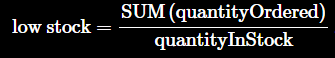

In [13]:
#Low Stock

query = """
    SELECT productCode, sum(quantityOrdered)/(SELECT quantityInStock 
                                                                 FROM products p
                                                                WHERE p.productCode = od.productCode) low_stock
      FROM orderdetails od
  GROUP BY productCode
  ORDER BY 2 Desc
"""

pd.read_sql(query, conn)

,productCode,low_stock
0,S24_2000,67
1,S12_1099,13
2,S32_4289,7
3,S32_1374,5
4,S72_3212,2
...,...,...
104,S10_4757,0
105,S10_4698,0
106,S10_2016,0
107,S10_1949,0


In [14]:
#Low Stock -> FLoat

query = """
    SELECT productCode, sum(quantityOrdered)*1.0/(SELECT quantityInStock 
                                                                 FROM products p
                                                                WHERE p.productCode = od.productCode) low_stock
      FROM orderdetails od
  GROUP BY productCode
  ORDER BY 2 Desc
     LIMIT 10
"""

pd.read_sql(query, conn)

,productCode,low_stock
0,S24_2000,67.666667
1,S12_1099,13.720588
2,S32_4289,7.147059
3,S32_1374,5.696629
4,S72_3212,2.314010
5,S700_3167,1.900181
6,S50_4713,1.653333
7,S18_2795,1.605839
8,S18_2248,1.540741
9,S700_1938,1.218453


In [15]:
# Round to 2 digits

query = """
    SELECT productCode, 
    Round(sum(quantityOrdered)*1.0/(SELECT quantityInStock 
                                    FROM products p 
                                    WHERE p.productCode = od.productCode),2) low_stock
      FROM orderdetails od
  GROUP BY productCode
  ORDER BY 2 Desc
     LIMIT 10
"""

pd.read_sql(query, conn)

,productCode,low_stock
0,S24_2000,67.67
1,S12_1099,13.72
2,S32_4289,7.15
3,S32_1374,5.70
4,S72_3212,2.31
5,S700_3167,1.90
6,S50_4713,1.65
7,S18_2795,1.61
8,S18_2248,1.54
9,S700_1938,1.22


# Product Performance

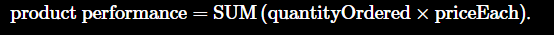

In [16]:
query = """
    SELECT productCode, sum(quantityOrdered*priceEach) prod_perf
     From orderdetails
     GROUP BY 1
     ORDER BY 2 DESC
     LIMIT 10"""

pd.read_sql(query,conn)

,productCode,prod_perf
0,S18_3232,276839.98
1,S12_1108,190755.86
2,S10_1949,190017.96
3,S10_4698,170686.00
4,S12_1099,161531.48
5,S12_3891,152543.02
6,S18_1662,144959.91
7,S18_2238,142530.63
8,S18_1749,140535.60
9,S12_2823,135767.03


In [17]:
# Common Table Expression (CTE)

query = """With
low_stock_table AS (
SELECT productCode, 
       ROUND(SUM(quantityOrdered) * 1.0/(SELECT quantityInStock
                                           FROM products p
                                          WHERE od.productCode = p.productCode), 2) AS low_stock
  FROM orderdetails od
 GROUP BY productCode
 ORDER BY low_stock DESC
 LIMIT 10
)

SELECT productCode FROM low_stock_table;
"""

pd.read_sql(query,conn)

,productCode
0,S24_2000
1,S12_1099
2,S32_4289
3,S32_1374
4,S72_3212
5,S700_3167
6,S50_4713
7,S18_2795
8,S18_2248
9,S700_1938


In [18]:
# Priority Products for restocking

query = """With
low_stock_table AS (
SELECT productCode, 
       ROUND(SUM(quantityOrdered) * 1.0/(SELECT quantityInStock
                                           FROM products p
                                          WHERE od.productCode = p.productCode), 2) AS low_stock
  FROM orderdetails od
 GROUP BY productCode
 ORDER BY low_stock DESC
 LIMIT 10
)

SELECT productCode, sum(quantityOrdered*priceEach) prod_perf
     From orderdetails
     Where productCode IN (SELECT productCode FROM low_stock_table)
     GROUP BY 1
     ORDER BY 2 DESC
     ;
"""

pd.read_sql(query,conn)

,productCode,prod_perf
0,S12_1099,161531.48
1,S18_2795,132275.98
2,S32_1374,89364.89
3,S700_3167,76618.40
4,S50_4713,73670.64
5,S700_1938,69531.61
6,S24_2000,67193.49
7,S32_4289,60493.33
8,S72_3212,47550.40
9,S18_2248,45306.77
